# Analyzing IPL data from 2008 to 2020.
This year IPL completed 13 years, in-spite of Covid-19 and lack of fans in the stands this year’s IPL was as good as any other.

I will be using 13 years of IPL data and try to answer below 4 questions using descriptive and inferential analysis.
We will see total matches played by each team and their winning percentage that will tell us which team have more winning percentage?
Which Stadium Hosted max number of matches? 
How toss affects the outcome of the game?
In which IPL Season maximum no. of runs are scored? 

In [3]:
#DATA ANALYSIS

import pandas as pd
import numpy as np

#DATA VISUALIZATION

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
matches = pd.read_csv(r"C:\Users\Shisha\Downloads\Compressed\matches.csv")
deliveries = pd.read_csv(r"C:\Users\Shisha\Downloads\Compressed\deliveries.csv")


# Understanding data :
we have 2 files here

matches.csv : this file contains details about each match. Which team played whom, on what day, which ground, winners, player of match, umpires , season, venue etc etc. 
deliveries.csv: this file contains details about each ball bowled in IPL history till 2020 season. it contains all the details related to each delivery. How many runs were score, who score the run, bowlers name, runs score, extra runs, fall of wicket, fielder, season, innings etc.

In [5]:
matches.shape


(816, 17)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [9]:
#Adding a Season Column to matches dataset 
matches['date'] = pd.to_datetime(matches.date)
matches['Season']= matches.date.dt.year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [10]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# DATA CLEANING

In [11]:
#finding null values in City column
matches[matches['city'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi,2014
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,2014
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,2014
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi,2014
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,2014
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi,2014
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,2014


In [12]:
#Filling null cities with respective city 
matches.loc[matches.venue =="Sharjah Cricket Stadium" , 'city'] = 'Sharjah'

In [13]:
matches.loc[matches['city'].isna(), 'city'] = 'Dubai'

In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             816 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [15]:
#Handling null values in winner column
matches.loc[matches.winner.isna(),'winner'] = 'No_Winner'

In [16]:
#Handling null values in player_of_match column
matches.loc[matches.player_of_match.isna(), 'player_of_match'] = "No_player_of_the_Match"

In [322]:

matches.loc[matches['result'].isna() , 'winner'] = 'No winner'


In [18]:
#Now we will replace team name that are mentioned wrong
matches.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)

In [19]:
matches.replace('Rising Pune Supergiants' , 'Pune Warriors' , inplace = True)

In [20]:
matches.team1.value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   37
Delhi Capitals                  19
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [21]:
matches.replace('Delhi Capitals' , 'Delhi Daredevils' , inplace = True)

In [22]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             816 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  816 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           816 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [23]:
#Now we will drop method column bcz it have many null values and we can ignore it.
matches.drop('method', axis=1, inplace=True)

In [24]:
#Here we handle null values in result , result_margin & eliminator column
matches.loc[matches['result'].isna() , 'result'] = 'No Result'

In [25]:
matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'

In [26]:
matches.loc[matches['eliminator'].isna(), 'eliminator'] = 'N'

In [27]:
#NOW OUR DATA IS CLEANED , WE REMOVED THE NAN VALUES THAT CAN EFFECT OUR ANALYSIS

# EDA


# MATCHES PLAYED VS WIN BY EACH TEAM??

In [28]:
# Here we will find various features of each team like total matches , winned matches and percentage
matches_played = pd.concat([matches['team1'],matches['team2']], axis=0)

In [29]:
matches_played = matches_played.value_counts().reset_index()

In [30]:
matches_played.columns =['Teams', 'Total Matches Played']

In [31]:
matches_played['winner'] = matches['winner'].value_counts().reset_index()['winner']

In [32]:
matches_played['winner_percentage'] = matches_played['winner']/matches_played['Total Matches Played']*100

In [33]:
matches_played

,Teams,Total Matches Played,winner,winner_percentage
0,Mumbai Indians,203,120,59.113300
1,Royal Challengers Bangalore,195,106,54.358974
2,Delhi Daredevils,194,99,51.030928
3,Kolkata Knight Riders,192,91,47.395833
4,Kings XI Punjab,190,88,46.315789
5,Chennai Super Kings,178,86,48.314607
6,Rajasthan Royals,161,81,50.310559
7,Sunrisers Hyderabad,124,66,53.225806
8,Pune Warriors,76,29,38.157895
9,Deccan Chargers,75,27,36.000000


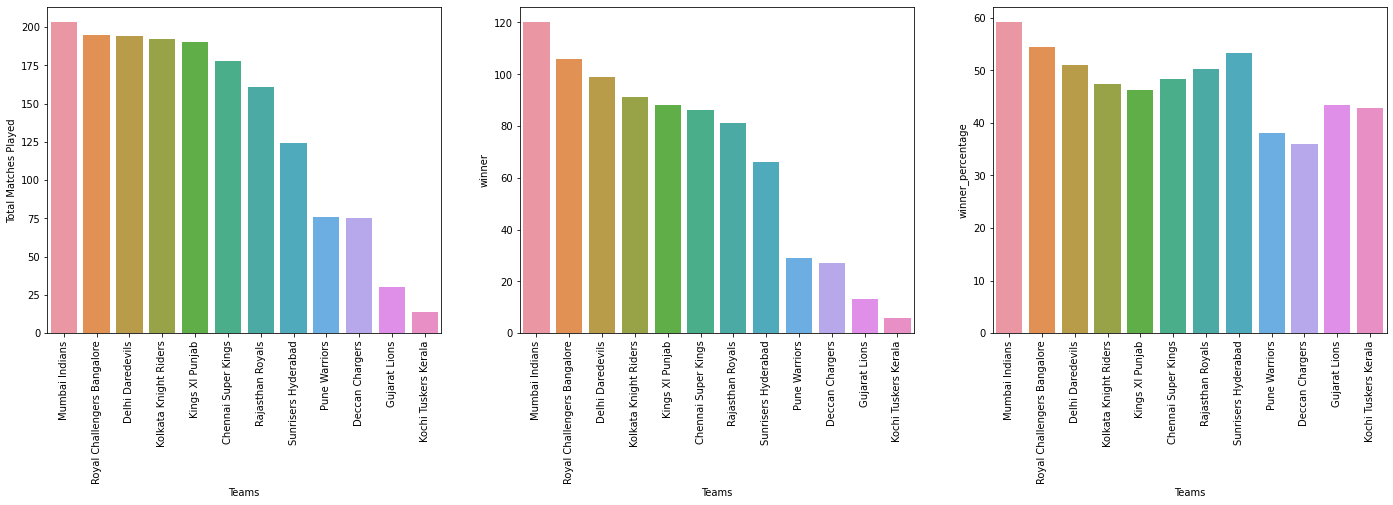

In [34]:
fig,axes = plt.subplots(nrows=1 , ncols=3, figsize=(24,6))
sns.barplot(x='Teams',y='Total Matches Played', data=matches_played, ax =axes[0]).set_xticklabels(
    matches_played['Teams'], rotation = 90)
sns.barplot(x='Teams',y='winner', data=matches_played, ax =axes[1]).set_xticklabels(
    matches_played['Teams'], rotation = 90)
sns.barplot(x='Teams',y='winner_percentage' , data=matches_played, ax =axes[2]).set_xticklabels(
    matches_played['Teams'], rotation = 90);

From here we can conclude that MUMBAI INDIANS have won maximum no. of matches and their winning percentage is also highest.
so we can say that MUMBAI INDIANS is the most succesful team of IPL

# Which Stadium host maximum matches ?

In [35]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,BF Bowden,K Hariharan,2008


In [36]:
stadium_matches = matches['venue'].value_counts().reset_index().sort_values(by ='venue' , ascending=False)

In [37]:
stadium_matches.columns = ['Stadium' , 'Total Matches']

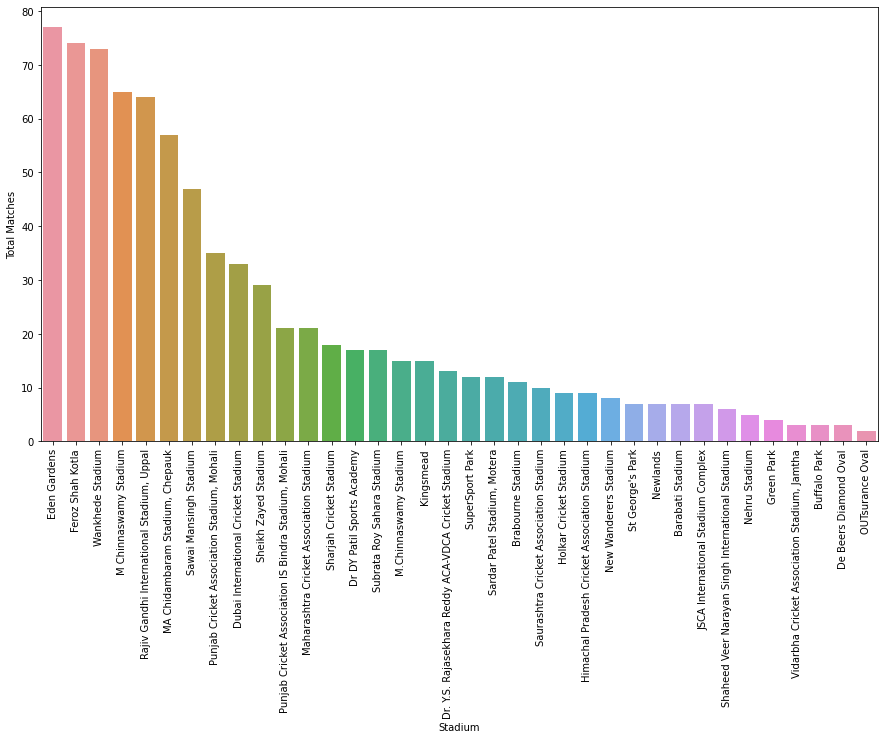

In [38]:
fig, axes = plt.subplots(figsize=(15,8))
sns.barplot(x='Stadium', y='Total Matches', data=stadium_matches
           ).set_xticklabels(stadium_matches['Stadium'],rotation=90);

FROM HERE WE CAN SAY THAT EDEN GARDENS HOSTED MAXIMUM NO. OF MATCHES

# NOW WE WILL SEE HOW TOSS EFFECTS THE RESULT OF A MATCH


In [ ]:
#FOR THIS WE WILL ADD A NEW COLUMN TOSS_EFFECT IN MATCHES DATASET AND WE WILL ASSIGN ITS VALUE TO 0 . IF A TOSS WINNING TEAM WON THE MATCH
# THEN WE CHANGE ITS VALUE TO 1

In [65]:
matches['toss_effect'] = 0

for i in matches.index:
    if matches.toss_winner[i] == matches.winner[i]:
        matches.toss_effect[i] = 1
       
matches.head() 



<ipython-input-65-3e1255641428>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.toss_effect[i] = 1


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season,toss_effect
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,Asad Rauf,RE Koertzen,2008,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,MR Benson,SL Shastri,2008,1
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,Aleem Dar,GA Pratapkumar,2008,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,SJ Davis,DJ Harper,2008,0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,BF Bowden,K Hariharan,2008,0


In [ ]:
#NOW WE WILL SEE EFFECT ON TOSS IN EACH SEASON

In [175]:
win = matches.groupby(['Season'])['toss_effect'].sum()
#calculate total number of games in each season
total_matches = matches.groupby('Season')['Season'].count()
toss_winner_ratio = np.round((win/total_matches) * 100, decimals = 1).reset_index()
toss_winner_ratio.columns= ['Season' ,'Percentage']

In [200]:
toss_winner_ratio

,Season,Percentage
0,2008,48.3
1,2009,57.9
2,2010,51.7
3,2011,52.1
4,2012,44.6
5,2013,47.4
6,2014,50.0
7,2015,47.5
8,2016,56.7
9,2017,57.6


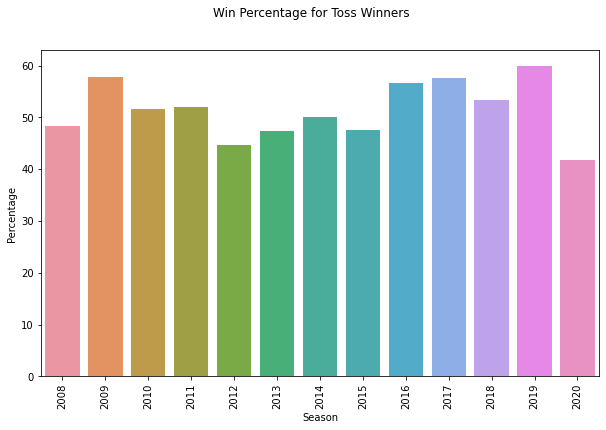

In [199]:
fig,axes = plt.subplots(figsize=(10,6))
fig.suptitle('Win Percentage for Toss Winners')
sns.barplot(x='Season',y='Percentage', data=toss_winner_ratio).set_xticklabels(
    toss_winner_ratio['Season'], rotation = 90);

# FROM VIEWING THE ABOVE DATA WE CAN CONCLUDE THAT THEIR IS NOT MUCH EFFECT OF TOSS AS IN IN MOST SEASONS IT IS AROUND 50%

In [ ]:
#NOW LETS SEE THE PERFORMANCE OF A TEAM AFTER WINNING TOSS

In [201]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season,toss_effect
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,Asad Rauf,RE Koertzen,2008,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,MR Benson,SL Shastri,2008,1
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,Aleem Dar,GA Pratapkumar,2008,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,SJ Davis,DJ Harper,2008,0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,BF Bowden,K Hariharan,2008,0


In [206]:
#LETS COUNT THE TOSS WINS BY EACH TEAM
toss_wins = matches.groupby('toss_winner')['toss_winner'].count()

In [207]:
toss_wins

toss_winner
Chennai Super Kings             97
Deccan Chargers                 43
Delhi Daredevils               100
Gujarat Lions                   15
Kings XI Punjab                 85
Kochi Tuskers Kerala             8
Kolkata Knight Riders           98
Mumbai Indians                 106
Pune Warriors                   33
Rajasthan Royals                87
Royal Challengers Bangalore     87
Sunrisers Hyderabad             57
Name: toss_winner, dtype: int64

In [210]:
toss_winner_matches = matches.groupby('toss_winner')['toss_effect'].sum()

In [211]:
toss_winner_matches

toss_winner
Chennai Super Kings            61
Deccan Chargers                19
Delhi Daredevils               45
Gujarat Lions                  10
Kings XI Punjab                36
Kochi Tuskers Kerala            4
Kolkata Knight Riders          55
Mumbai Indians                 61
Pune Warriors                  11
Rajasthan Royals               44
Royal Challengers Bangalore    43
Sunrisers Hyderabad            29
Name: toss_effect, dtype: int64

In [244]:
#now we find the win percentage of a toss winning team
winner_percentage = np.round((toss_winner_matches/toss_wins)*100 , decimals=2).reset_index()

In [246]:
winner_percentage.columns = ['Team' , 'Percentage']

In [257]:
winner_percentage.sort_values(by='Team' )

,Team,Percentage
0,Chennai Super Kings,62.89
1,Deccan Chargers,44.19
2,Delhi Daredevils,45.00
3,Gujarat Lions,66.67
4,Kings XI Punjab,42.35
5,Kochi Tuskers Kerala,50.00
6,Kolkata Knight Riders,56.12
7,Mumbai Indians,57.55
8,Pune Warriors,33.33
9,Rajasthan Royals,50.57


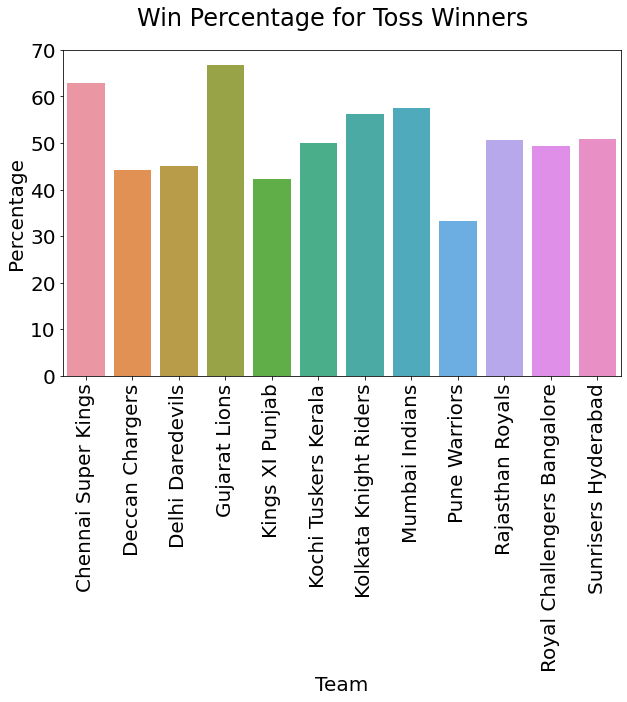

In [249]:
fig,axes = plt.subplots(figsize=(10,6))
fig.suptitle('Win Percentage for Toss Winners')
sns.barplot(x='Team',y='Percentage', data=winner_percentage).set_xticklabels(
    winner_percentage['Team'], rotation = 90);

Clearly teams like Chennai Super Kings, Kolkata Knight Riders and Mumbai Indians have better
win percentage when they win toss. This gives them an edge over other teams in knockout stages 
where win or loss can eliminate other team and make you finalist or even champian.
Gujarat Loins is clearly a leader in this category but given it has played only
2 seasons we are choosing to ignore this franchise.

# In which IPL Season maximum no. of runs are scored? 

In [268]:
deliveries.head() #for this we need to use deliveries dataset

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [338]:
runs = matches.merge(deliveries,  how = 'left')#here we merge both columns
total_runs_season = runs.groupby(['Season'])['total_runs'].sum().reset_index()
matches_season = matches.groupby(['Season']).count()["id"].reset_index()
matches_season.rename(columns={'id':'matches'},inplace=True)
matches_season["total_runs"] = total_runs_season["total_runs"]
matches_season["average_runs_per_match"] = matches_season["total_runs"]/ matches_season['matches']
matches_season.sort_values(by='total_runs' , ascending=False)

,Season,matches,total_runs,average_runs_per_match
5,2013,76,22541,296.592105
4,2012,74,22453,303.418919
3,2011,73,21154,289.780822
10,2018,60,19901,331.683333
11,2019,60,19400,323.333333
12,2020,60,19352,322.533333
6,2014,60,18909,315.150000
2,2010,60,18864,314.400000
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


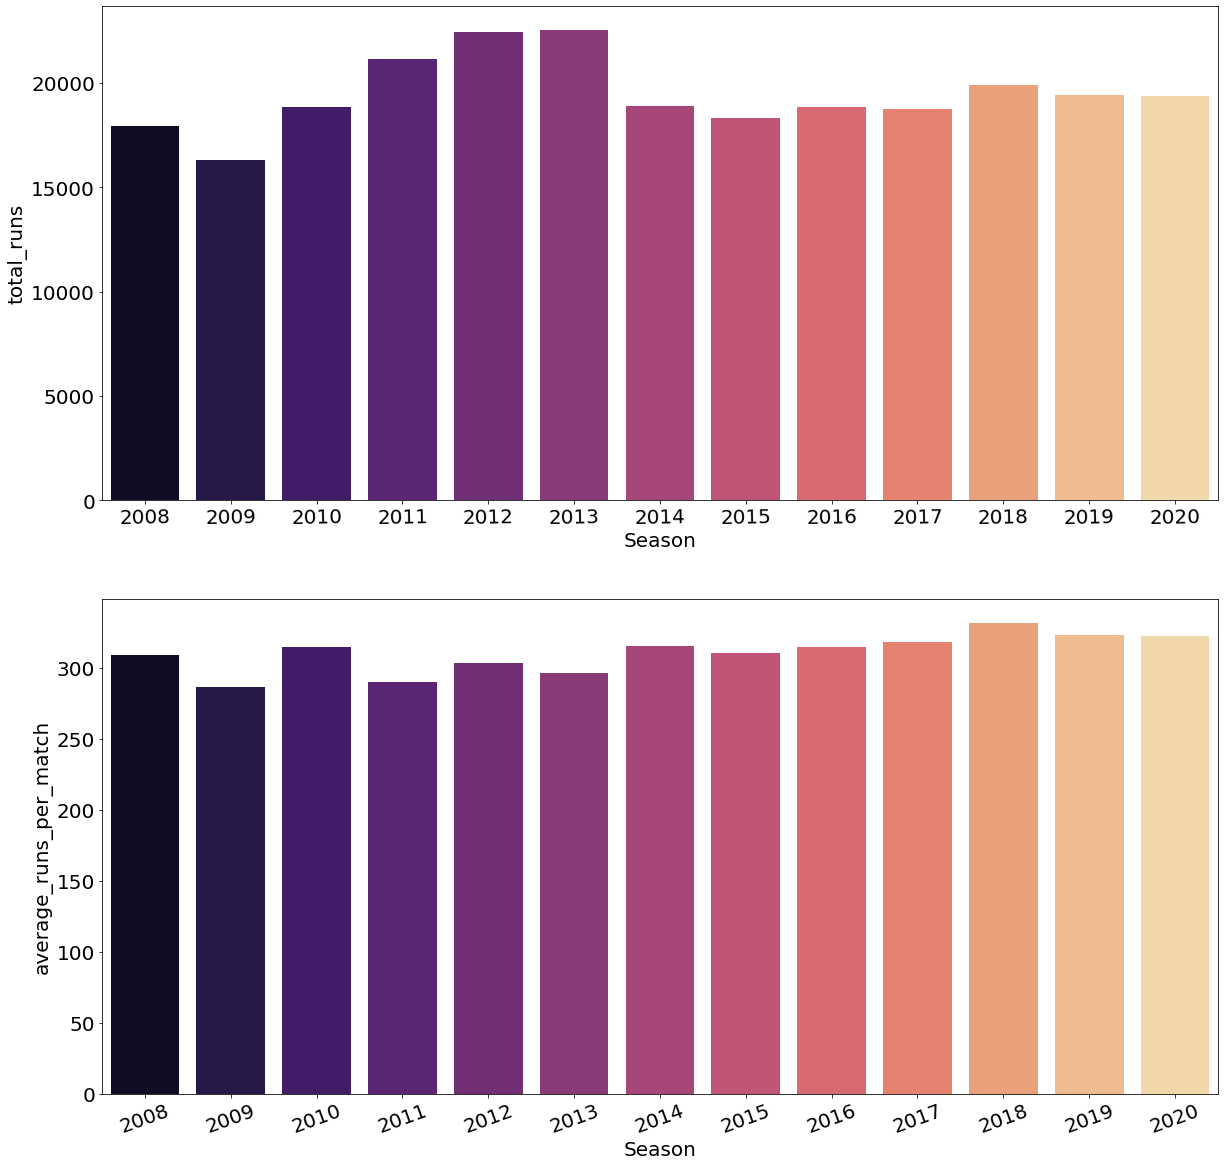

In [294]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(20, 20))
sns.barplot(x='Season',y='total_runs',data=matches_season, ax=axes[0],palette='magma').set_xticklabels(
    matches_season["Season"],rotation=1)
sns.barplot(x='Season',y='average_runs_per_match',data=matches_season, ax=axes[1],palette='magma').set_xticklabels(
    matches_season["Season"],rotation=20);

#From here we can say that in Season 2013 maximum no. of runs are scored with an average of 296.5 runs per match